<img src = excelrlogo.png/>

### ASSIGNMENT-16 - NEURAL NETWORKS

#### PROBLEM STATEMENT -- gas_turbines

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
gas_turbines = pd.read_csv("gas_turbines.csv")
gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


#### EDA/ GETTING INFORMATION OF DATASET

In [3]:
gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gas_turbines.shape

(15039, 11)

In [5]:
gas_turbines.describe

<bound method NDFrame.describe of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.5

In [6]:
gas_turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


#### Generating reproducible results from same code

In [8]:
import tensorflow as tf
tf.random.set_seed(14) 

#### Checking for null values

In [9]:
gas_turbines.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### Checking for duplicate values

In [10]:
gas_turbines.duplicated().sum()

0

In [11]:
gas_turbines_Dup = gas_turbines[['AT','AP','AH','TEY']]
gas_turbines_Dup

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [12]:
gas_turbines_Dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [13]:
gas_turbines_Dup.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


C:\Users\gk521\AppData\Local\Temp\ipykernel_872\2936182826.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas_turbines_Dup.AT, ax = ax[0,0])
C:\Users\gk521\AppData\Local\Temp\ipykernel_872\2936182826.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas_turbines_Dup.AP, ax = ax[0,1])
C:\U

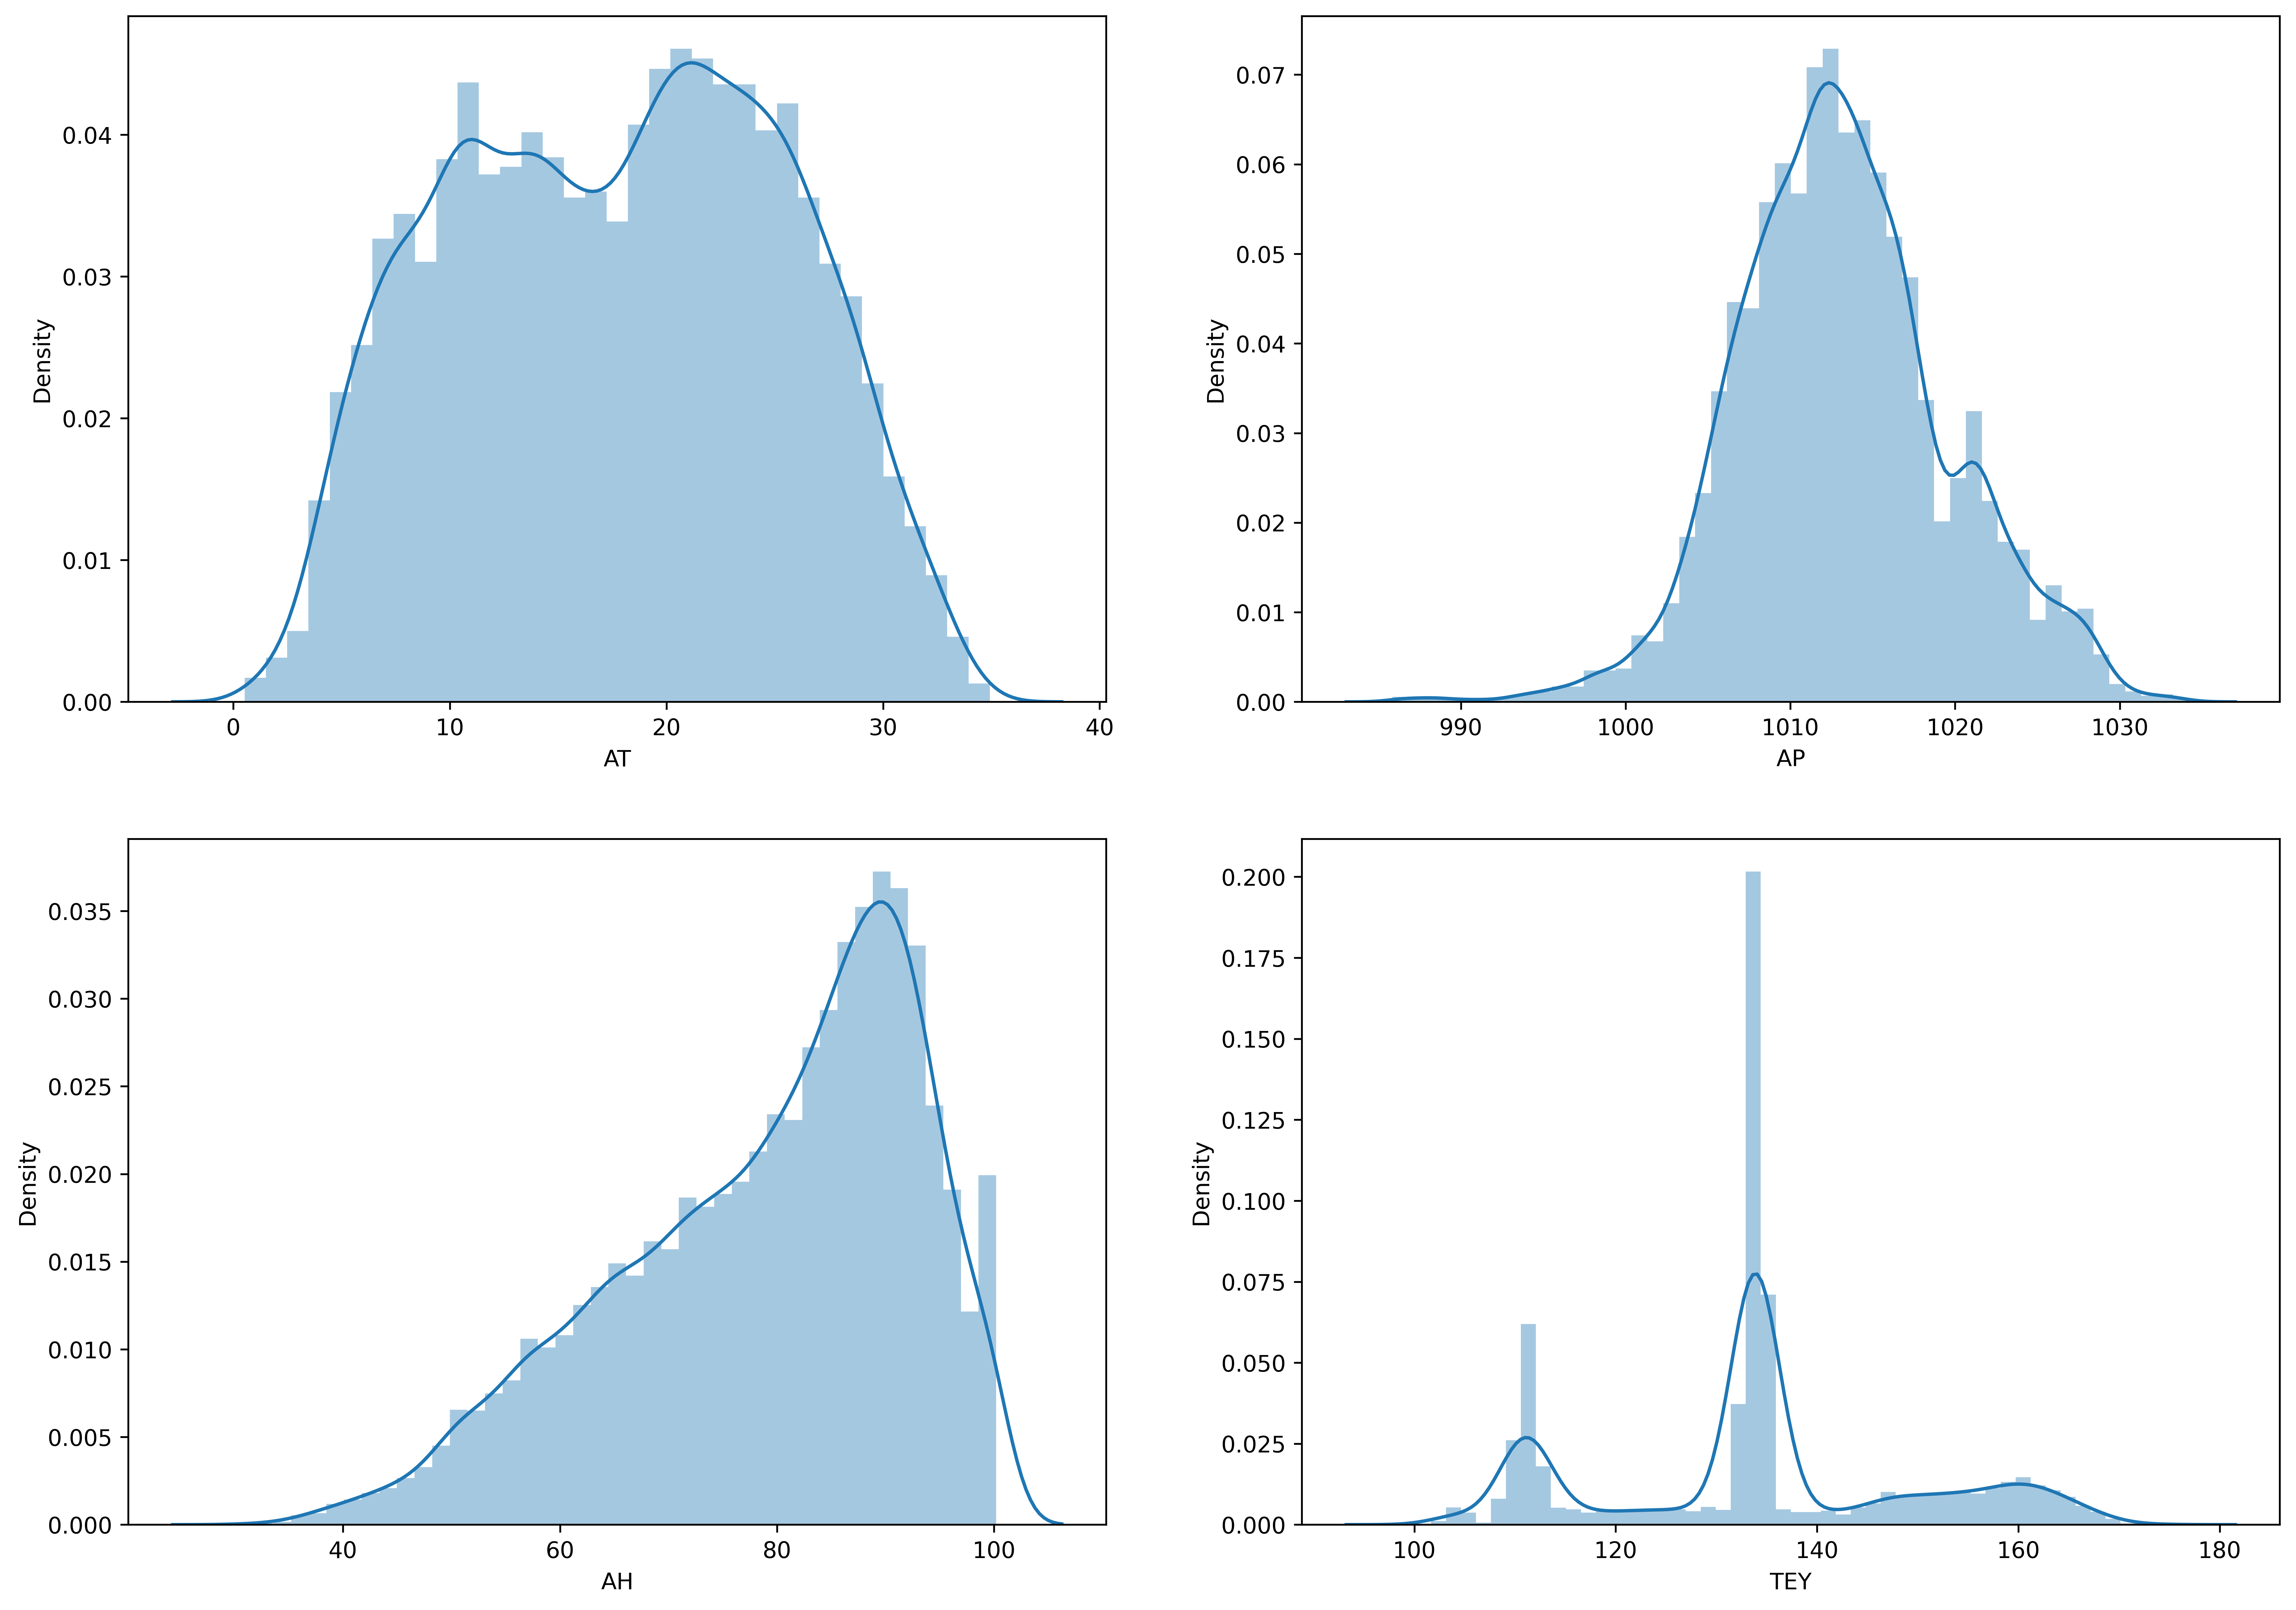

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)
sns.distplot(gas_turbines_Dup.AT, ax = ax[0,0])
sns.distplot(gas_turbines_Dup.AP, ax = ax[0,1])
sns.distplot(gas_turbines_Dup.AH, ax = ax[1,0])
sns.distplot(gas_turbines_Dup.TEY, ax = ax[1,1])
plt.show()

#### Outlier detection

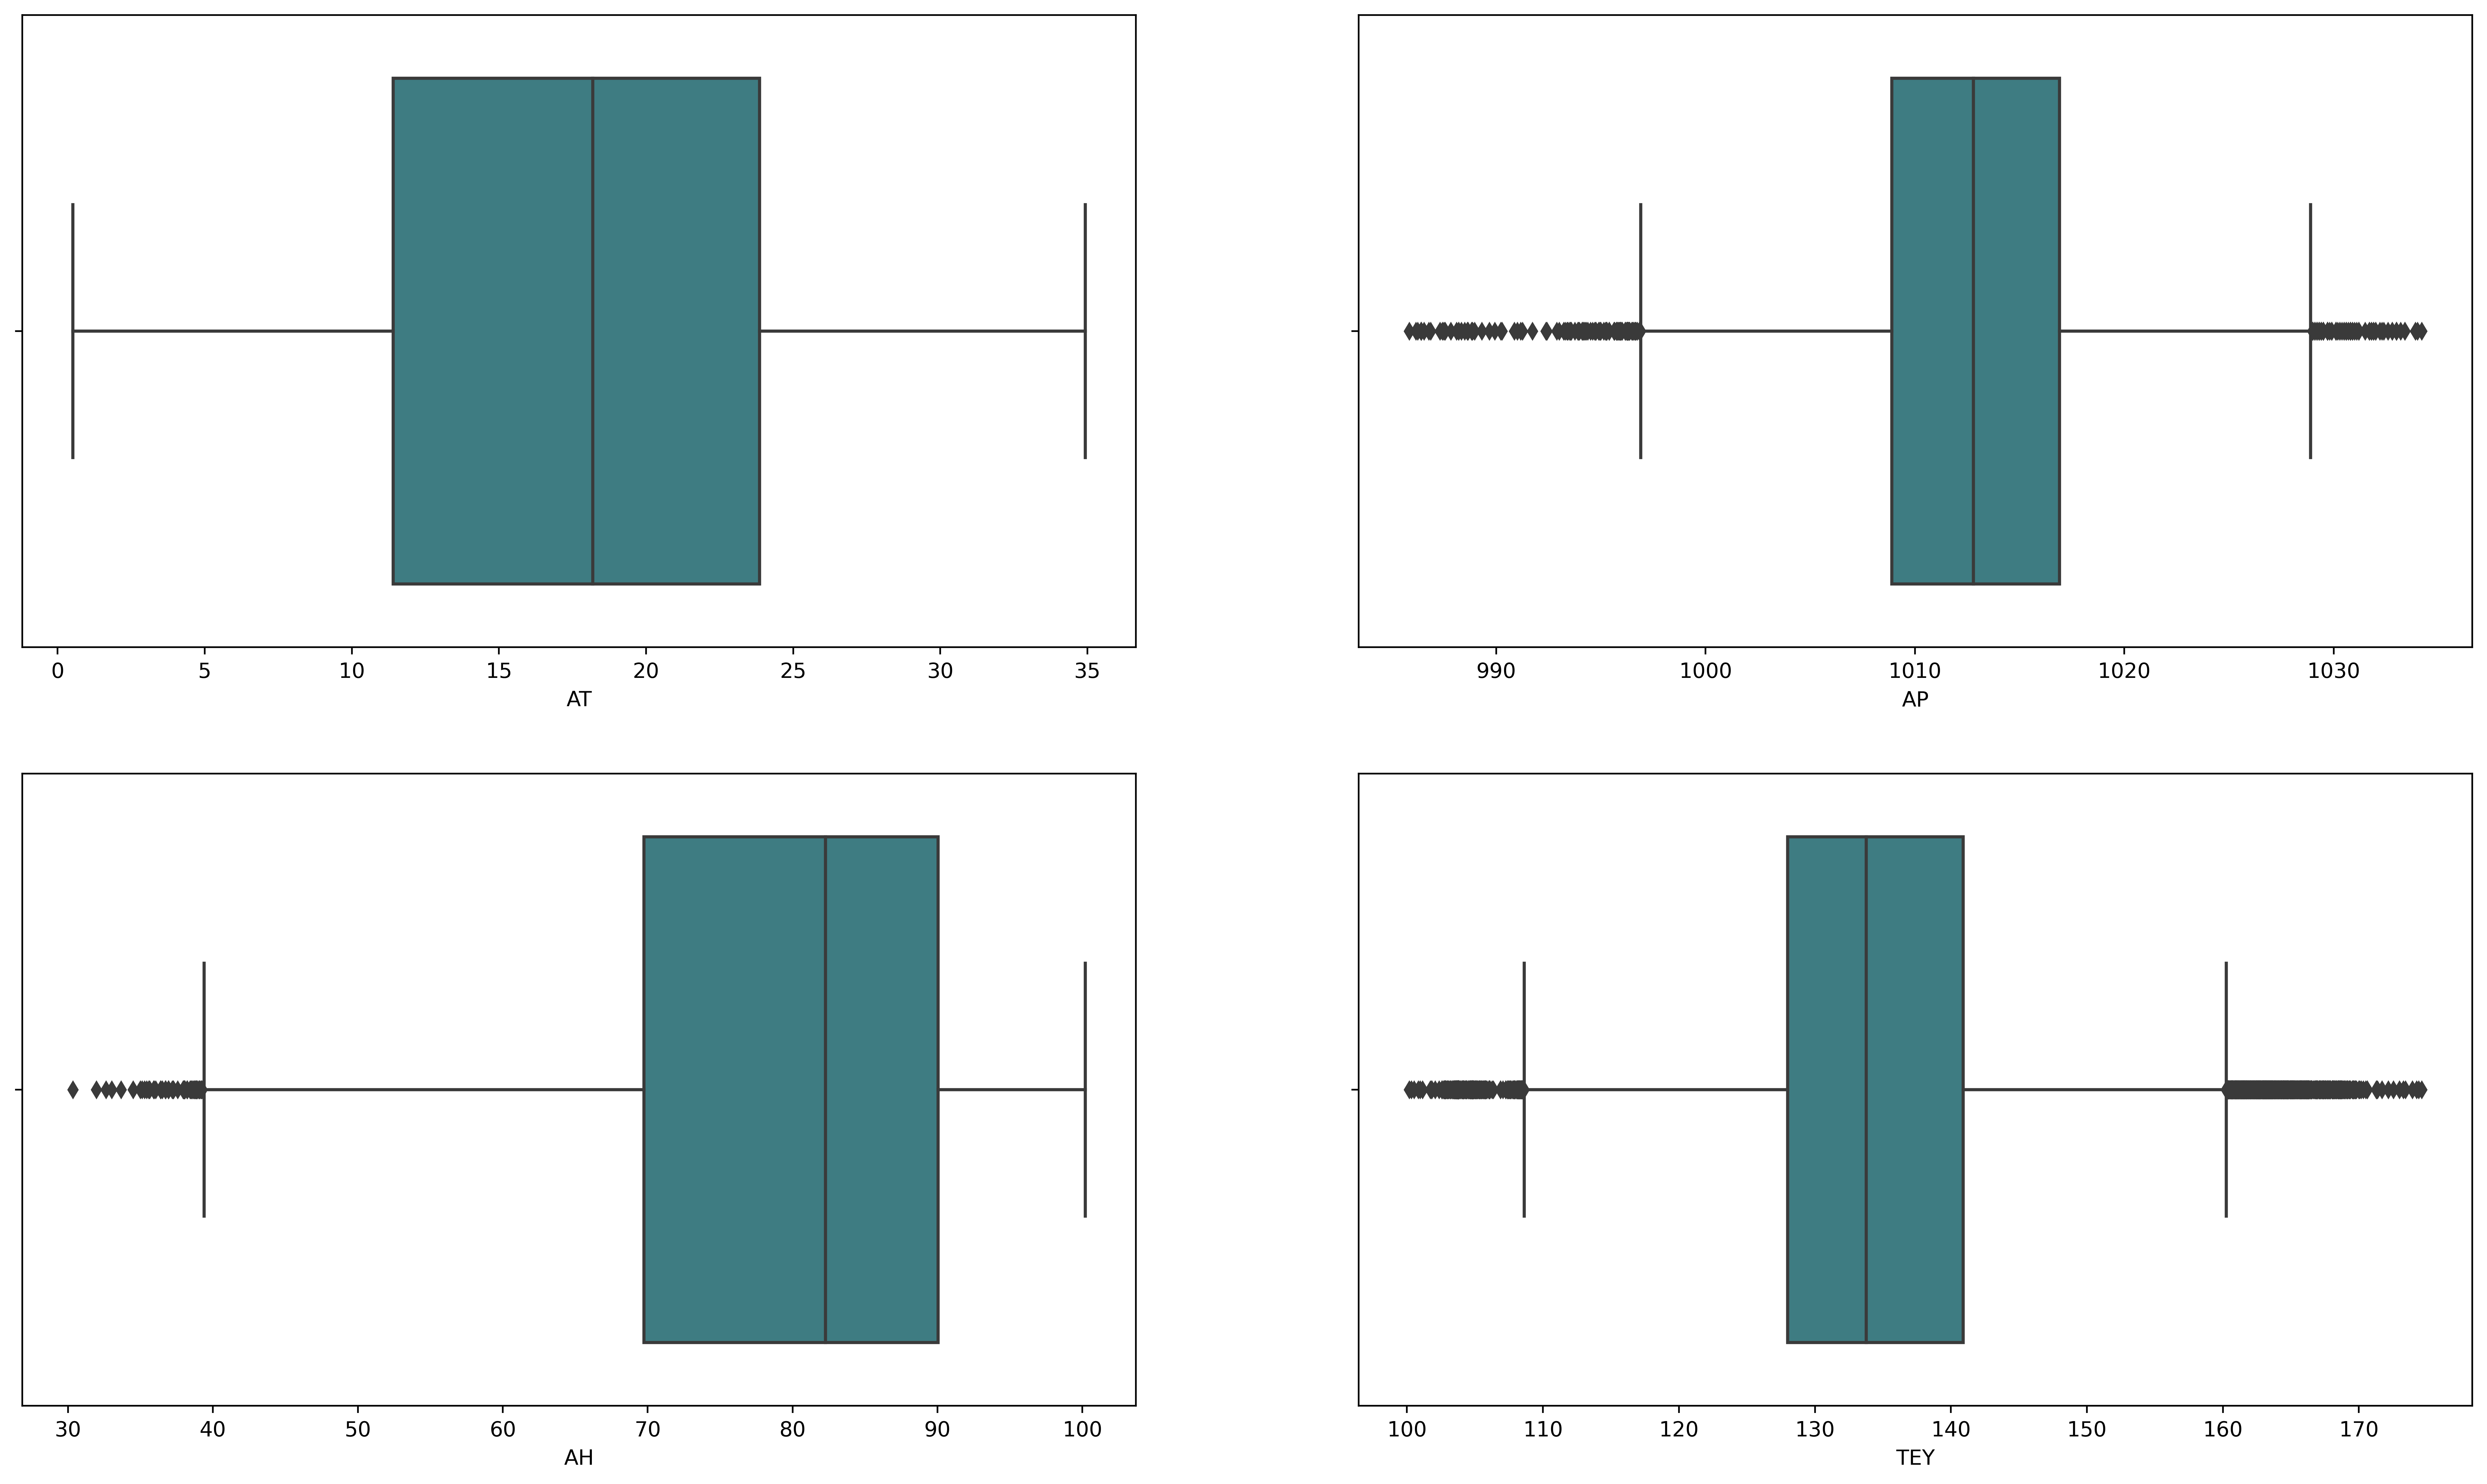

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12),dpi=500)
sns.boxplot(x='AT',data = gas_turbines_Dup,palette='crest',ax=axes[0,0])
sns.boxplot(x='AP',data = gas_turbines_Dup,palette='crest',ax=axes[0,1])
sns.boxplot(x='AH',data = gas_turbines_Dup,palette='crest',ax=axes[1,0])
sns.boxplot(x='TEY',data = gas_turbines_Dup,palette='crest',ax=axes[1,1])
plt.show()

Text(0.5, 1.0, 'Histogram of the Target Column')

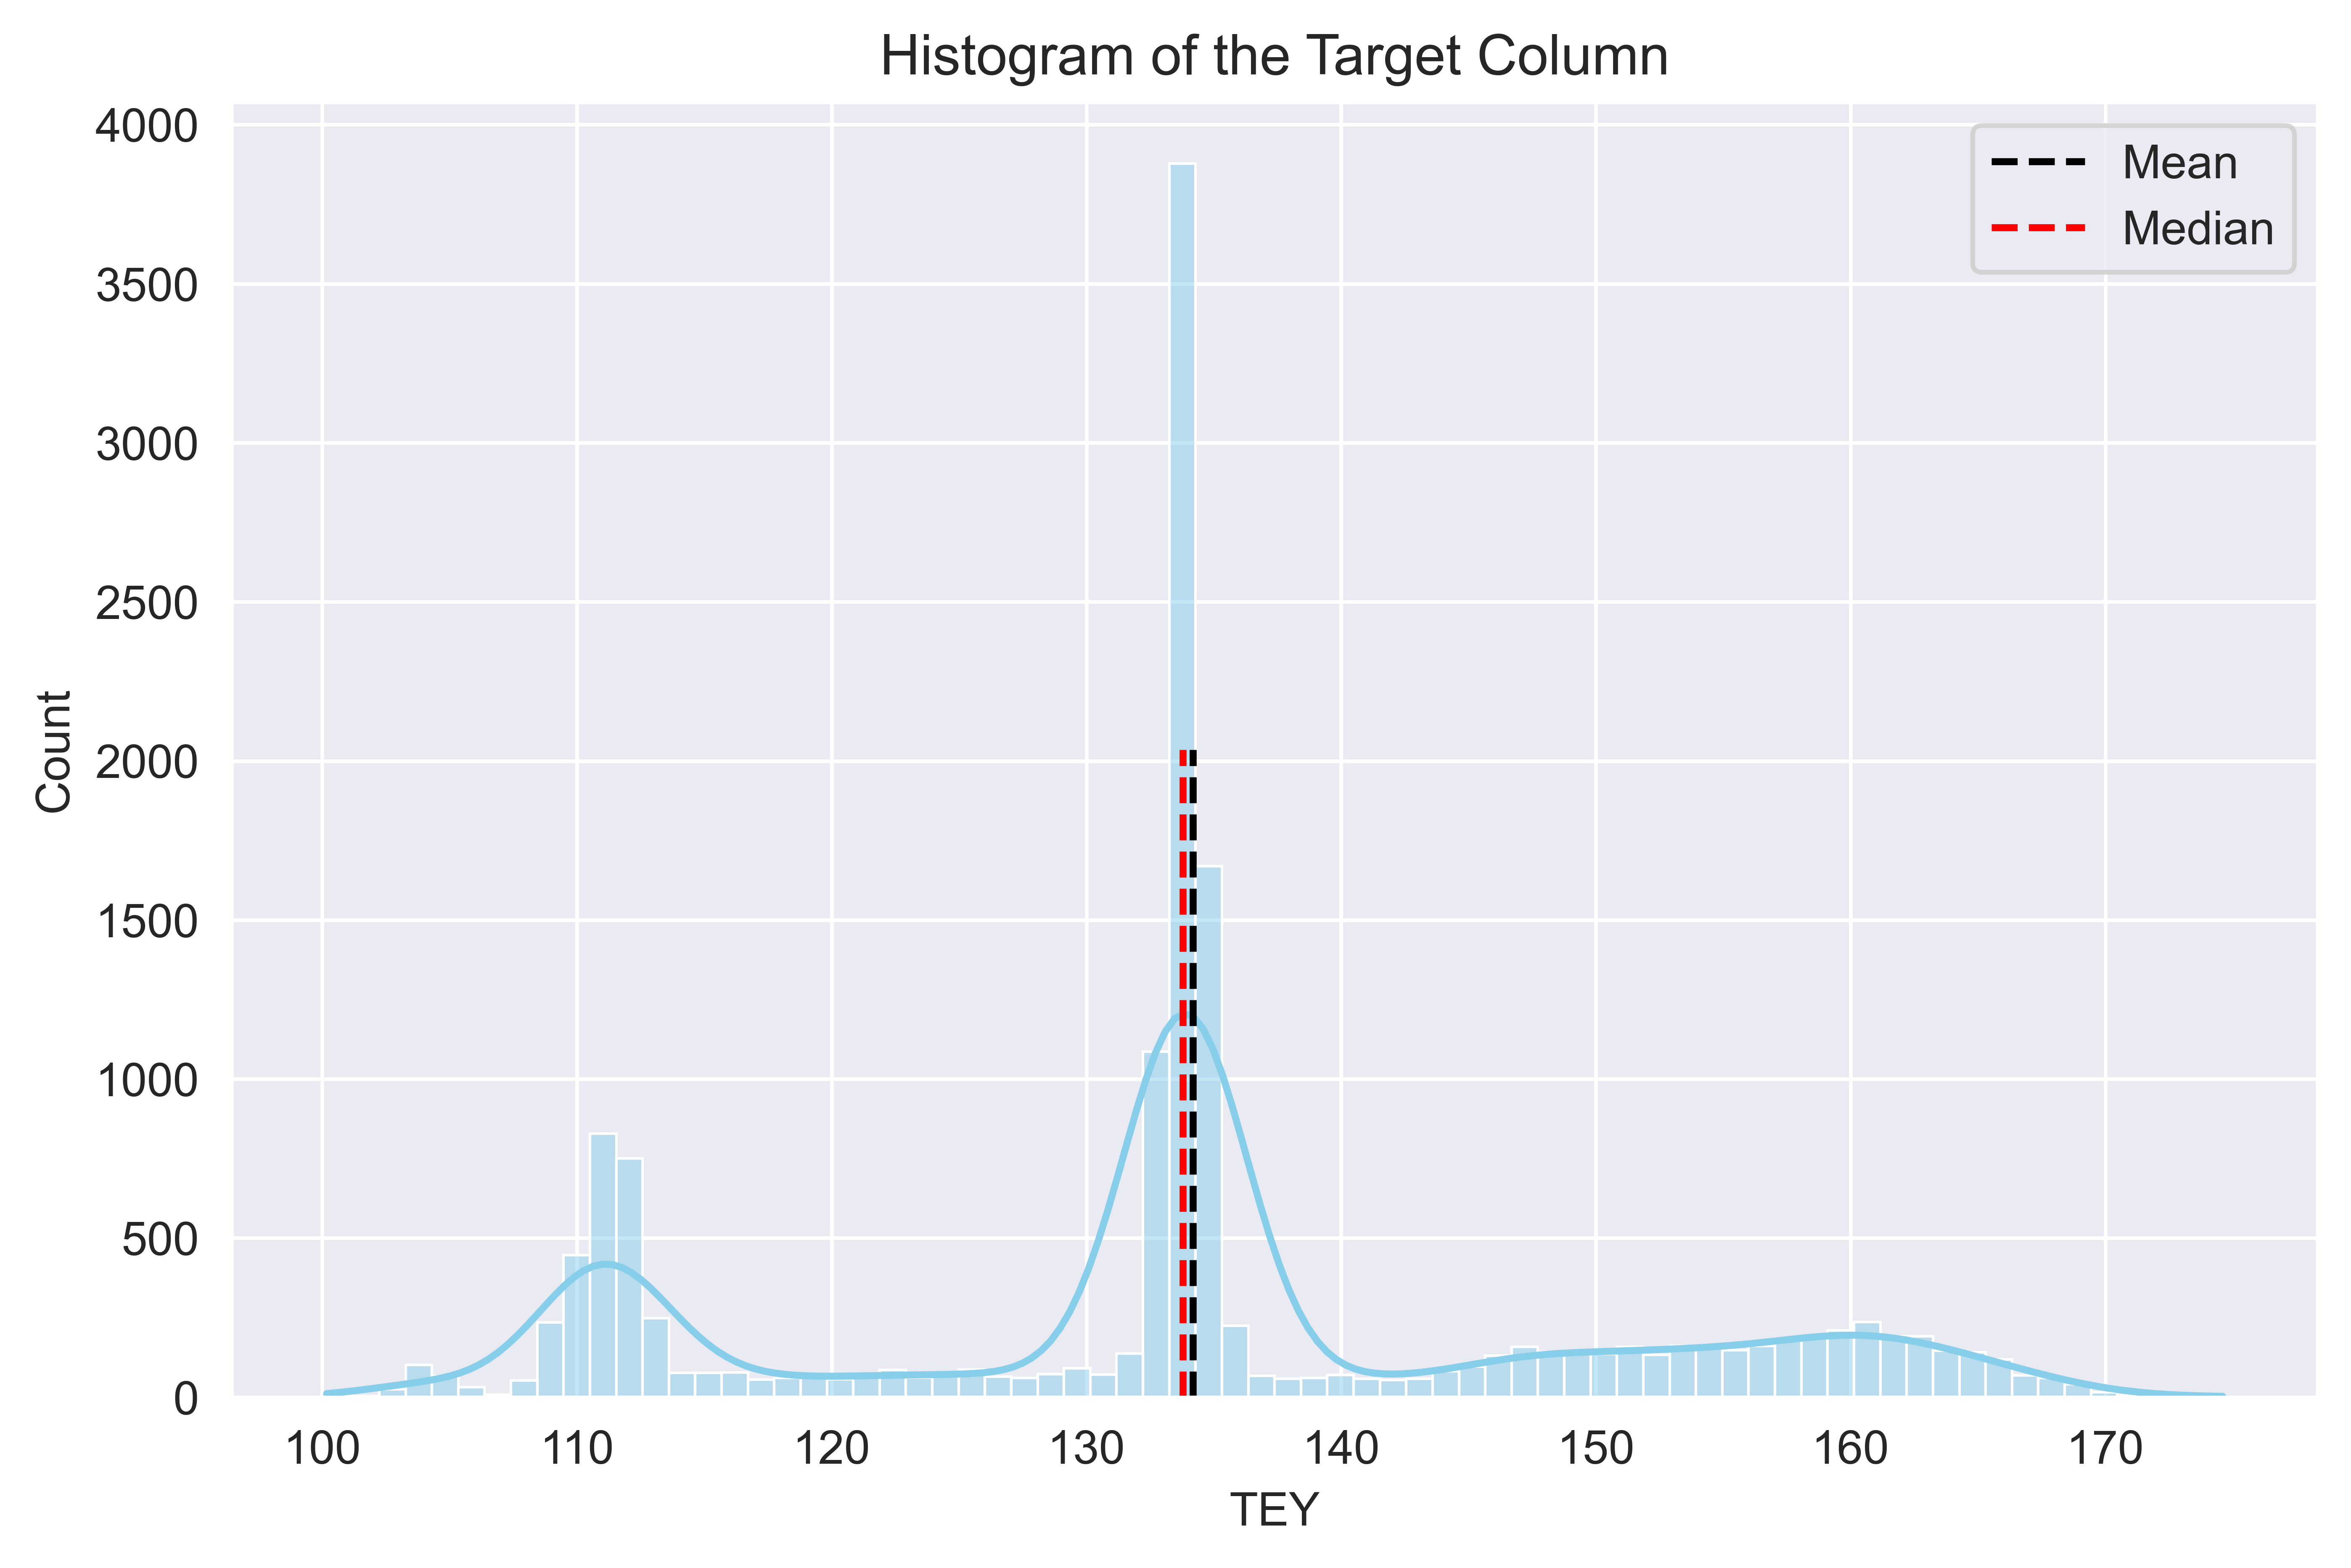

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5),dpi=800)
sns.histplot(data = gas_turbines_Dup,x="TEY",color="skyblue",kde=True)
plt.axvline(x = gas_turbines_Dup["TEY"].mean(),ymax=0.5,color="black",linestyle='--',label="Mean")
plt.axvline(x = gas_turbines_Dup["TEY"].median(),ymax=0.5,color="red",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

#### HEATMAP

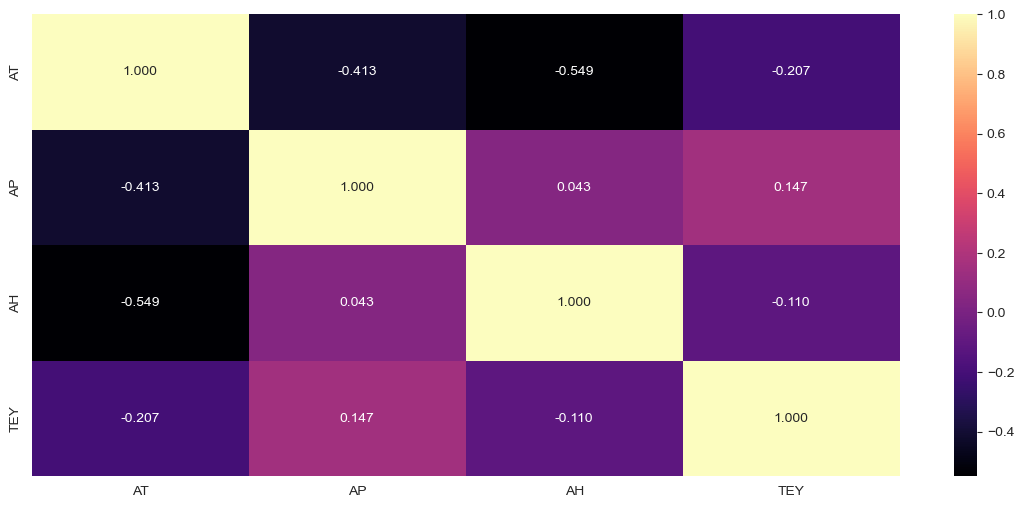

In [18]:
plt.figure(figsize = (14, 6));
sns.heatmap(gas_turbines_Dup.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

#### Feature Analysis

In [19]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
X = gas_turbines_Dup.iloc[:,:-1]
Y = gas_turbines_Dup.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [22]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [24]:
len(xtrain_scale)

10527

In [25]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [26]:
scores = fit.scores_
features = fit.transform(X)

In [27]:
score_gas_turbines_Dup = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_gas_turbines_Dup.sort_values(by="Score", ascending=False, inplace=True)
score_gas_turbines_Dup

,Score,Feature
0,0.412480,AT
1,0.138194,AP
2,0.097685,AH


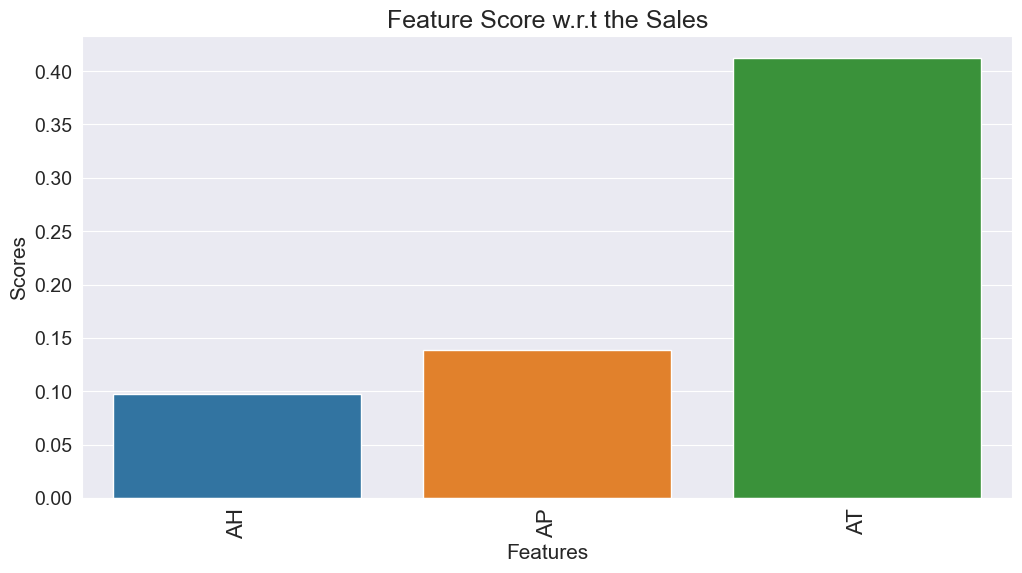

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data = score_gas_turbines_Dup, order = score_gas_turbines_Dup.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [29]:
score_gas_turbines_Dup.sort_values('Score', ascending=False)

,Score,Feature
0,0.412480,AT
1,0.138194,AP
2,0.097685,AH


#### Neural network modelling

In [31]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [33]:
hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 4s 42ms/step - loss: 0.0712 - mse: 0.0712 - mae: 0.2044 - val_loss: 0.0464 - val_mse: 0.0464 - val_mae: 0.1586
Epoch 2/100
48/48 [==============================] - 1s 21ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1541 - val_loss: 0.0455 - val_mse: 0.0455 - val_mae: 0.1536
Epoch 3/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0456 - mse: 0.0456 - mae: 0.1540 - val_loss: 0.0454 - val_mse: 0.0454 - val_mae: 0.1580
Epoch 4/100
48/48 [==============================] - 1s 17ms/step - loss: 0.0449 - mse: 0.0449 - mae: 0.1540 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1543
Epoch 5/100
48/48 [==============================] - 1s 20ms/step - loss: 0.0443 - mse: 0.0443 - mae: 0.1543 - val_loss: 0.0439 - val_mse: 0.0439 - val_mae: 0.1554
Epoch 6/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0435 - mse: 0.0435 - mae: 0.1554 - val_loss: 0.0430 - val_mse: 0.0430 - val_mae: 0.1546
Epoch 7/100
48/4

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Define the first model architecture

In [35]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

In [36]:
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
658/658 [==============================] - 6s 6ms/step - loss: 268.5233 - mae: 12.4227 - val_loss: 270.2016 - val_mae: 13.0945
Epoch 2/50
658/658 [==============================] - 3s 5ms/step - loss: 247.2391 - mae: 12.1485 - val_loss: 230.6957 - val_mae: 11.3959
Epoch 3/50
658/658 [==============================] - 3s 5ms/step - loss: 238.7221 - mae: 12.0632 - val_loss: 232.9349 - val_mae: 11.8595
Epoch 4/50
658/658 [==============================] - 3s 4ms/step - loss: 232.7328 - mae: 12.0129 - val_loss: 226.8410 - val_mae: 11.8187
Epoch 5/50
658/658 [==============================] - 4s 6ms/step - loss: 237.1455 - mae: 12.2827 - val_loss: 229.8979 - val_mae: 12.0201
Epoch 6/50
658/658 [==============================] - 3s 5ms/step - loss: 236.3171 - mae: 12.2703 - val_loss: 227.2141 - val_mae: 11.8657
Epoch 7/50
658/658 [==============================] - 4s 6ms/step - loss: 231.8877 - mae: 12.1279 - val_loss: 225.7872 - val_mae: 11.8791
Epoch 8/50
658/658 [==============

In [37]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Define the second model architecture

In [38]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

In [39]:
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
329/329 [==============================] - 3s 6ms/step - loss: 12.2971 - mse: 269.6714 - val_loss: 11.2926 - val_mse: 243.4909
Epoch 2/100
329/329 [==============================] - 2s 6ms/step - loss: 11.8714 - mse: 250.0739 - val_loss: 11.5979 - val_mse: 243.5429
Epoch 3/100
329/329 [==============================] - 2s 5ms/step - loss: 11.6984 - mse: 245.2150 - val_loss: 12.0269 - val_mse: 247.1328
Epoch 4/100
329/329 [==============================] - 2s 7ms/step - loss: 11.7167 - mse: 244.6770 - val_loss: 11.2533 - val_mse: 240.1324
Epoch 5/100
329/329 [==============================] - 2s 5ms/step - loss: 11.6692 - mse: 242.4167 - val_loss: 11.6128 - val_mse: 243.9801
Epoch 6/100
329/329 [==============================] - 1s 4ms/step - loss: 11.8189 - mse: 244.8954 - val_loss: 11.3045 - val_mse: 239.5025
Epoch 7/100
329/329 [==============================] - 2s 5ms/step - loss: 11.8873 - mse: 246.2288 - val_loss: 11.4830 - val_mse: 239.1551
Epoch 8/100
329/329 [======

In [40]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model Evaluation

In [41]:
y_predict = model.predict(xtest_scale)

141/141 [==============================] - 1s 4ms/step


In [42]:
y_pred1 = model1.predict(xtest_scale)

141/141 [==============================] - 1s 3ms/step


In [43]:
y_pred2 = model2.predict(xtest_scale)

141/141 [==============================] - 1s 4ms/step


In [44]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [45]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038463,0.038463,0.155502,0.039218,0.039218,0.158991,95
96,0.038686,0.038686,0.156955,0.039122,0.039122,0.156590,96
97,0.038690,0.038690,0.156103,0.040481,0.040481,0.161276,97
98,0.038846,0.038846,0.155946,0.039241,0.039241,0.159017,98
99,0.038497,0.038497,0.156006,0.040250,0.040250,0.159335,99


#### Visualising

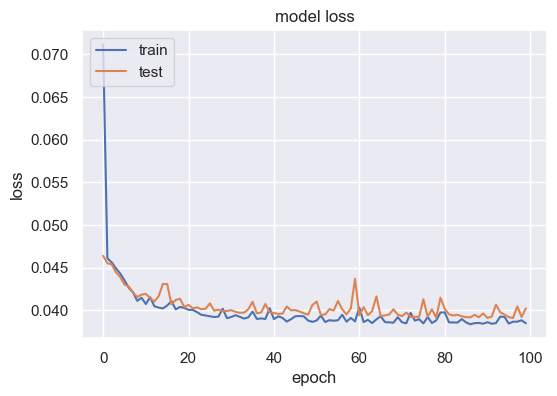

In [46]:
sns.set(rc={'figure.figsize':(6,4)})
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

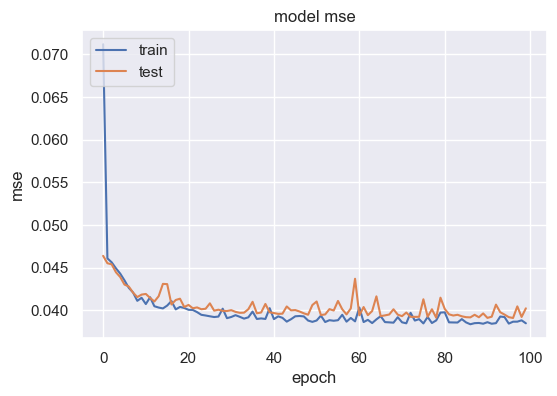

In [47]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### CONCLUSION

 This code conducts a comprehensive analysis of the gas turbines dataset. It preprocesses the data, performs feature selection, and trains multiple neural network models to predict turbine energy yield. The model evaluation metrics and visualizations provide insights into the performance of the models. Further analysis or improvements in modeling techniques could be considered for refining the predictions.

### Thank You!